In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import quandl
f = open('quandlsecret.txt', 'r')
quandl.ApiConfig.api_key = f.readline()
f.close()

C:\Users\Daniel\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
btcprices = quandl.get('BCHARTS/COINBASEUSD', collapse='daily')
btcprices.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2015-02-04,228.77,230.25,221.85,227.11,3344.120783,7.578076e+05,226.608934
2015-05-11,241.59,245.49,239.50,242.86,6176.481242,1.498052e+06,242.541273
2015-05-12,242.74,243.40,240.37,242.03,6322.571412,1.531046e+06,242.155569
2015-05-13,242.04,244.13,235.54,236.32,10028.946883,2.424123e+06,241.712609
2015-05-14,236.93,240.00,232.61,237.46,10365.968041,2.462002e+06,237.508205


We'll go from 2015-05-11 since that's when we start getting consecutive days. We'll end on 2019-01-07. Now we need to get the S&P500 historical data for the same period.

In [3]:
start = dt.datetime(2015, 5, 11)
end = dt.datetime(2019, 1, 7)
sp500 = web.DataReader(['sp500'], 'fred', start, end)
sp500.head()

,sp500
DATE,
2015-05-11,2105.33
2015-05-12,2099.12
2015-05-13,2098.48
2015-05-14,2121.10
2015-05-15,2122.73


In [7]:
data = sp500
data['btcusd'] = btcprices['Close']
data['ratio'] = data['sp500'] / data['btcusd']
data.head()

,sp500,btcusd,ratio
DATE,,,
2015-05-11,2105.33,242.86,8.668904
2015-05-12,2099.12,242.03,8.672974
2015-05-13,2098.48,236.32,8.879824
2015-05-14,2121.10,237.46,8.932452
2015-05-15,2122.73,237.82,8.925784


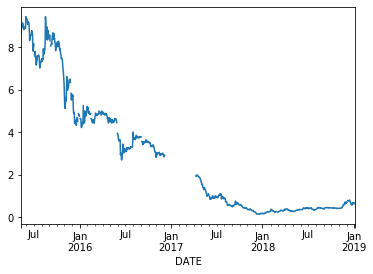

In [9]:
data['ratio'].plot.line()